### The Mind

set up a function with number of players, number of cards each

then return array of arrays with generated cards for each player, sorted low to high

e.g.

setup_game(num_players=3, num_cards=4)

returns

    [
    [1, 24, 56, 98],
    [8, 25, 29, 76],
    [36, 45, 64, 81],
    ]


In [2]:
import random

def shuffle_cards(total_cards: int):
    """Selects a sample of cards to play with."""
    return random.sample(range(1, 101), k=total_cards)

def deal_cards(dealt_cards, players: int, cards: int):
    """Splits sampled cards into lists for each player"""
    return [dealt_cards[i * cards:(i + 1) * cards] for i in range(players)]

def sort_cards(split_cards):
    split_cards_copy = split_cards.copy()
    for hand in split_cards_copy:
        hand.sort()
    return split_cards_copy

def setup_game(players: int, cards: int):
    total_cards = players * cards
    
    dealt_cards = shuffle_cards(total_cards)

    split_cards = deal_cards(dealt_cards, players, cards)

    sorted_cards = sort_cards(split_cards)

    return sorted_cards

def rank_game(split_cards):
    # Flatten all cards into one list
    all_cards = sorted(x for hand in split_cards for x in hand)

    # Create dictionary mapping card -> rank
    rank_map = {card: i + 1 for i, card in enumerate(all_cards)}

    # Replace each card with its global rank
    ranked_cards = [[rank_map[card] for card in hand] for hand in split_cards]
    return ranked_cards


def card_differences(cards):
    diffs = []
    prev = 1  # first difference is compared to 1
    for card in cards:
        diffs.append(card - prev)
        prev = card
    return diffs

def generate_diffs(players: int, cards: int):
    """Generate a diff between the sorted cards"""
    total_cards = players * cards
    shuffled = shuffle_cards(total_cards)
    sorted_cards = sorted(shuffled)
    diffs = card_differences(sorted_cards)
    return diffs

def combine_games(array):
    combined = []
    for game in array:
        combined.extend(game)
    return combined
    

In [38]:
players = 4
cards = 5

game = setup_game(players, cards)
print(game)
for i, player_cards in enumerate(game, start=1):
    print(f"Player {i}: {player_cards}")

ranked_cards = rank_game(game)

print(f"ranked game: {ranked_cards}")

[[47, 52, 69, 83, 95], [19, 42, 72, 84, 92], [44, 51, 58, 88, 97], [14, 32, 45, 57, 99]]
Player 1: [47, 52, 69, 83, 95]
Player 2: [19, 42, 72, 84, 92]
Player 3: [44, 51, 58, 88, 97]
Player 4: [14, 32, 45, 57, 99]
ranked game: [[7, 9, 12, 14, 18], [2, 4, 13, 15, 17], [5, 8, 11, 16, 19], [1, 3, 6, 10, 20]]


In [98]:
players = 3
cards = 4
total_cards = players * cards

print(f"Num cards: {players * cards}")
print(f"Differences: {generate_diffs(players, cards)}\n")

a = [generate_diffs(players, cards) for _ in range(10)]
print(a)

combined = combine_games(a)
# combined_diffs = []

# for inner in a:
#     combined_diffs.extend(inner)

print(f"Combined: {combined}")

for game in a:
    print(game)

Num cards: 12
Differences: [1, 14, 19, 3, 20, 6, 6, 4, 6, 3, 1, 13]

[[0, 4, 7, 29, 5, 9, 3, 12, 9, 1, 7, 8], [8, 1, 5, 3, 3, 9, 12, 10, 24, 13, 2, 7], [7, 1, 6, 4, 24, 3, 2, 13, 1, 2, 1, 35], [10, 1, 20, 9, 8, 2, 2, 6, 1, 9, 29, 1], [37, 1, 5, 9, 5, 4, 1, 5, 4, 14, 2, 4], [1, 5, 7, 3, 19, 16, 5, 3, 10, 3, 9, 14], [14, 2, 9, 4, 8, 19, 1, 5, 1, 3, 9, 24], [1, 21, 5, 1, 19, 7, 3, 2, 10, 2, 3, 18], [1, 2, 2, 3, 2, 29, 18, 3, 22, 6, 8, 1], [11, 1, 16, 2, 3, 4, 1, 1, 15, 4, 5, 16]]
Combined: [0, 4, 7, 29, 5, 9, 3, 12, 9, 1, 7, 8, 8, 1, 5, 3, 3, 9, 12, 10, 24, 13, 2, 7, 7, 1, 6, 4, 24, 3, 2, 13, 1, 2, 1, 35, 10, 1, 20, 9, 8, 2, 2, 6, 1, 9, 29, 1, 37, 1, 5, 9, 5, 4, 1, 5, 4, 14, 2, 4, 1, 5, 7, 3, 19, 16, 5, 3, 10, 3, 9, 14, 14, 2, 9, 4, 8, 19, 1, 5, 1, 3, 9, 24, 1, 21, 5, 1, 19, 7, 3, 2, 10, 2, 3, 18, 1, 2, 2, 3, 2, 29, 18, 3, 22, 6, 8, 1, 11, 1, 16, 2, 3, 4, 1, 1, 15, 4, 5, 16]
[0, 4, 7, 29, 5, 9, 3, 12, 9, 1, 7, 8]
[8, 1, 5, 3, 3, 9, 12, 10, 24, 13, 2, 7]
[7, 1, 6, 4, 24, 3, 2, 13, 1, 2, 1,

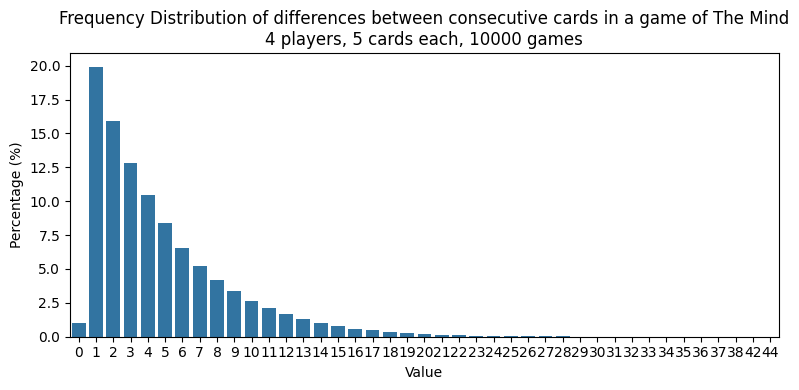

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_frequency_distribution(data, games: int, players: int, cards: int):
    plt.figure(figsize=(8, 4))

    # Count the frequency of each value
    sns.countplot(x=data, stat="percent")

    plt.title(f"Frequency Distribution of differences between consecutive cards in a game of The Mind\n{players} players, {cards} cards each, {games} games")
    plt.xlabel("Value")
    plt.ylabel("Percentage (%)")
    plt.tight_layout()
    plt.show()

players = 4
cards = 5
games = 10000
# Example usage:
diffs = [generate_diffs(players, cards) for _ in range(games)]
data = combine_games(diffs)
plot_frequency_distribution(data, games, players, cards)


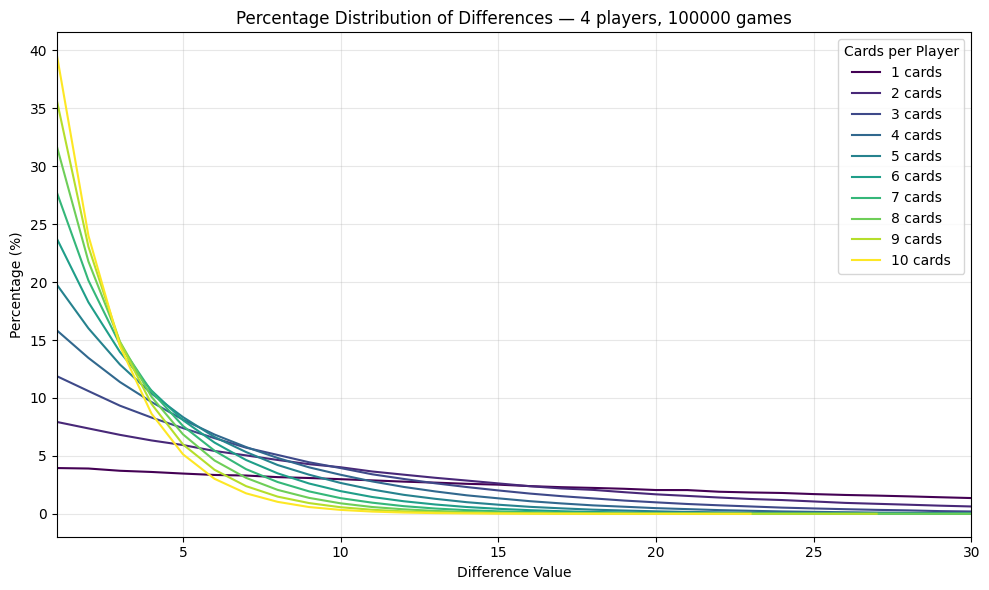

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

def get_percentage_distribution(data):
    total = len(data)
    counts = Counter(data)
    max_val = max(counts.keys())
    percentages = {i: (counts.get(i, 0) / total) * 100 for i in range(max_val + 1)}
    return percentages


def plot_percentage_lines(players: int, max_cards: int, games: int):
    plt.figure(figsize=(10, 6))

    # Create a color spectrum with one entry per card count
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, max_cards))

    for idx, cards in enumerate(range(1, max_cards + 1)):
        diffs = [generate_diffs(players, cards) for _ in range(games)]
        data = combine_games(diffs)

        percentages = get_percentage_distribution(data)
        df = pd.DataFrame({
            "difference": list(percentages.keys()),
            "percentage": list(percentages.values()),
            "cards": [cards] * len(percentages)
        })

        sns.lineplot(
            data=df,
            x="difference",
            y="percentage",
            label=f"{cards} cards",
            color=colors[idx]
        )

    plt.title(f"Percentage Distribution of Differences — {players} players, {games} games")
    plt.xlabel("Difference Value")
    plt.ylabel("Percentage (%)")
    plt.legend(title="Cards per Player")
    plt.grid(True, alpha=0.3)
    plt.xlim(1, 30)
    plt.tight_layout()
    plt.show()


plot_percentage_lines(players=4, max_cards=10, games=100000)


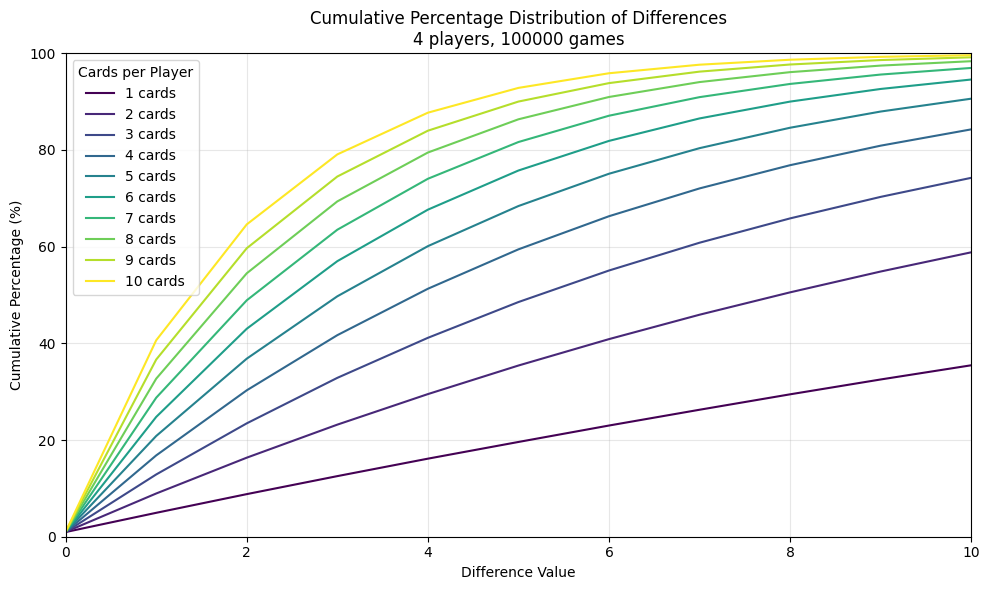

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

def get_percentage_distribution(data):
    total = len(data)
    counts = Counter(data)
    max_val = max(counts.keys())
    percentages = {i: (counts.get(i, 0) / total) * 100 for i in range(max_val + 1)}
    return percentages


def plot_cumulative_percentage_lines(players: int, max_cards: int, games: int):
    plt.figure(figsize=(10, 6))

    # Color spectrum
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, max_cards))

    for idx, cards in enumerate(range(1, max_cards + 1)):
        diffs = [generate_diffs(players, cards) for _ in range(games)]
        data = combine_games(diffs)

        percentages = get_percentage_distribution(data)

        # Convert to cumulative distribution
        cumulative_values = np.cumsum(list(percentages.values()))

        df = pd.DataFrame({
            "difference": list(percentages.keys()),
            "cumulative_percentage": cumulative_values,
            "cards": [cards] * len(percentages)
        })

        sns.lineplot(
            data=df,
            x="difference",
            y="cumulative_percentage",
            label=f"{cards} cards",
            color=colors[idx]
        )

    plt.title(f"Cumulative Percentage Distribution of Differences\n{players} players, {games} games")
    plt.xlabel("Difference Value")
    plt.ylabel("Cumulative Percentage (%)")
    plt.legend(title="Cards per Player")
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 100)
    plt.xlim(0, 10)
    plt.tight_layout()
    plt.show()


plot_cumulative_percentage_lines(players=4, max_cards=10, games=100000)


In [ ]:
# average gap
# normal distribution for each player x # cards combo
import numpy as np

def geometric_mean(values):
    if not values:
        return 0  # or raise ValueError("Empty list")

    product = 1
    for v in values:
        if v == 0:
            continue
        product *= v
    
    return product ** (1 / len(values))

players = 4
cards = 8
games = 10000

# Example usage:
diffs = [generate_diffs(players, cards) for _ in range(games)]
print(diffs)

data = combine_games(diffs)

def average_of_geometric_means(games) -> float:
    """Compute arithmetic mean of geometric means for sublists."""
    gms = [geometric_mean(round) for round in games]
    return sum(gms) / len(gms)

def geometric_mean_of_diffs_for_game(players: int, cards: int, games=10000):
    diffs = [generate_diffs(players, cards) for _ in range(games)]
    return average_of_geometric_means(diffs)

print(average_of_geometric_means(diffs))

print(geometric_mean_of_diffs_for_game(4, 8, games=10000))


[[2, 2, 6, 4, 1, 8, 6, 4, 4, 7, 2, 1, 1, 1, 1, 1, 1, 3, 2, 11, 3, 5, 2, 2, 3, 1, 4, 1, 4, 4, 1, 1], [1, 1, 2, 3, 2, 4, 1, 5, 6, 6, 3, 5, 5, 4, 1, 4, 3, 1, 2, 1, 1, 1, 3, 2, 10, 1, 6, 5, 1, 1, 3, 1], [7, 2, 2, 1, 4, 2, 4, 3, 7, 2, 2, 2, 2, 1, 4, 1, 8, 7, 6, 1, 1, 3, 1, 4, 1, 7, 1, 1, 1, 7, 1, 2], [0, 4, 9, 1, 5, 6, 4, 5, 2, 1, 7, 1, 2, 2, 5, 3, 1, 2, 3, 2, 2, 5, 2, 1, 3, 1, 1, 2, 2, 3, 1, 5], [5, 2, 4, 2, 2, 3, 2, 3, 1, 3, 2, 1, 4, 2, 4, 5, 1, 7, 2, 1, 1, 13, 2, 5, 1, 2, 2, 2, 5, 2, 2, 4], [2, 5, 2, 1, 1, 3, 4, 2, 3, 7, 2, 3, 9, 1, 2, 3, 1, 2, 1, 5, 2, 5, 1, 1, 10, 2, 4, 2, 3, 2, 1, 1], [6, 9, 3, 1, 6, 3, 1, 4, 2, 7, 1, 2, 4, 1, 1, 2, 2, 1, 2, 1, 1, 9, 5, 3, 2, 3, 1, 3, 1, 4, 1, 3], [1, 2, 6, 1, 1, 2, 3, 1, 2, 5, 3, 4, 1, 7, 3, 4, 9, 2, 4, 2, 1, 1, 1, 1, 4, 4, 9, 2, 6, 2, 3, 1], [3, 2, 3, 4, 2, 1, 1, 3, 3, 2, 5, 1, 7, 2, 3, 3, 3, 2, 10, 2, 2, 1, 4, 1, 4, 1, 4, 3, 4, 9, 1, 1], [0, 10, 1, 8, 3, 9, 5, 3, 1, 4, 1, 4, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1, 6, 3, 1, 1, 2, 9, 7, 1, 1, 1], [2, 1, 9, 4, 

does the difficulty scale with # cards?
what makes the game difficult?
- big gaps

so what's the geometric mean of each player x card combo?

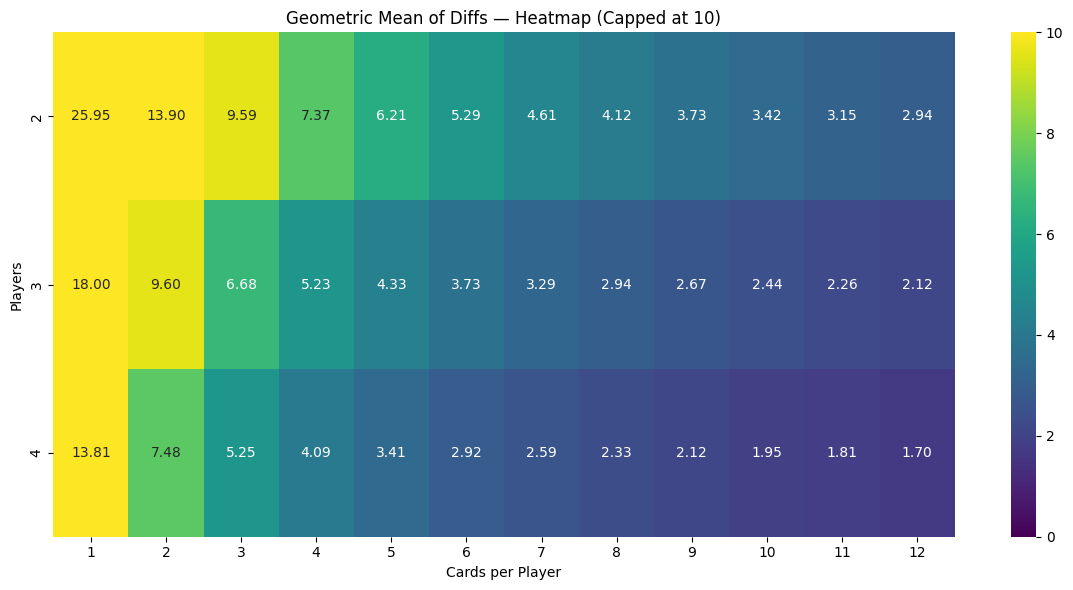

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(players_max: int = 4, cards_max: int = 12, games: int = 10000):
    gm_matrix = []

    for players in range(2, players_max + 1):
        row = []
        for cards in range(1, cards_max + 1):
            gm = geometric_mean_of_diffs_for_game(players, cards, games)
            row.append(gm)
        gm_matrix.append(row)

    df = pd.DataFrame(
        gm_matrix,
        index=[f"{p}" for p in range(2, players_max + 1)],
        columns=[f"{c}" for c in range(1, cards_max + 1)]
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        df,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        vmin=0,
        vmax=10
    )

    plt.title("Geometric Mean of Diffs — Heatmap (Capped at 10)")
    plt.xlabel("Cards per Player")
    plt.ylabel("Players")
    plt.tight_layout()
    plt.show()


# Run the heatmap
plot_heatmap(games=1000)


C:\Users\adam_\AppData\Local\Temp\ipykernel_14160\271378774.py:23: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


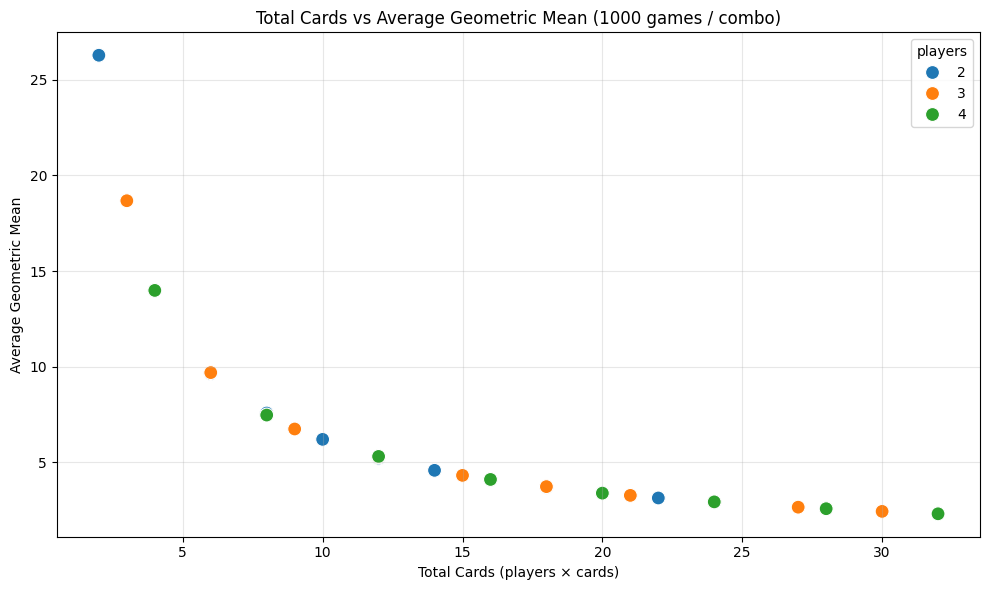

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_total_cards_vs_gm(players_max: int = 4, cards_max: int = 12, games: int = 10000):
    results = []

    for players in range(2, players_max + 1):
        for cards in range(1, cards_max + 1):
            if (players >= 3 and cards > 10) or (players == 4 and cards > 8):
                continue
            gm = geometric_mean_of_diffs_for_game(players, cards, games)
            results.append({
                "total_cards": players * cards,
                "geometric_mean": gm,
                "players": players,
                "cards": cards
            })

    df = pd.DataFrame(results)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x="total_cards",
        y="geometric_mean",
        hue="players",        # color by #players for clarity
        palette=sns.color_palette("tab10", n_colors=players_max),
        s=100
    )

    plt.title(f"Total Cards vs Average Geometric Mean ({games} games / combo)")
    plt.xlabel("Total Cards (players × cards)")
    plt.ylabel("Average Geometric Mean")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# Run it ✅
plot_scatter_total_cards_vs_gm(games=1000)


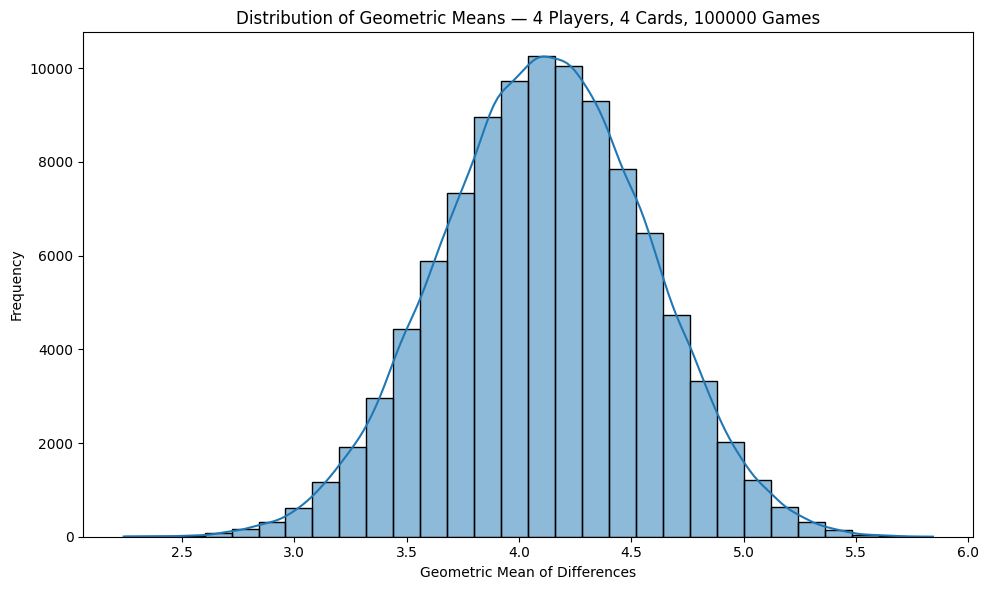

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Adjusted function to get geometric mean per game
def geometric_means_per_game(players: int, cards: int, games: int = 1000):
    """Return a list of geometric means, one per game."""
    gm_list = []
    for _ in range(games):
        diffs = generate_diffs(players, cards)  # list of diffs for this game
        gm = average_of_geometric_means([diffs])  # wrap in list to use your function
        gm_list.append(gm)
    return gm_list

# Generate data
players = 4
cards = 4
games = 100000
gm_data = geometric_means_per_game(players, cards, games)

# Put in a DataFrame for seaborn
df = pd.DataFrame({"geometric_mean": gm_data})

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["geometric_mean"], kde=True, bins=30)
plt.title(f"Distribution of Geometric Means — {players} Players, {cards} Cards, {games} Games")
plt.xlabel("Geometric Mean of Differences")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


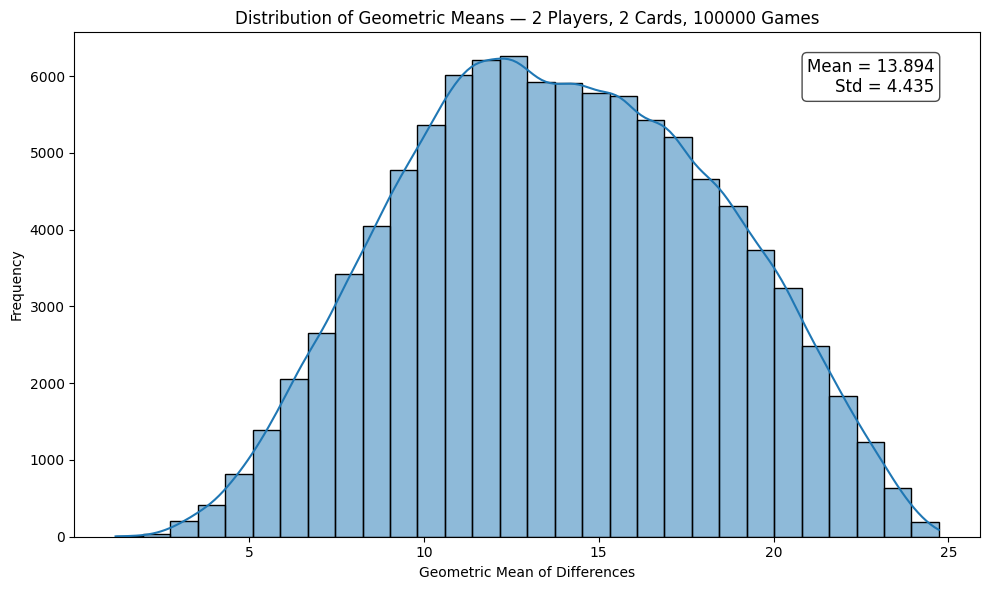

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate per-game geometric means
def geometric_means_per_game(players: int, cards: int, games: int = 1000):
    """Return a list of geometric means, one per game."""
    gm_list = []
    for _ in range(games):
        diffs = generate_diffs(players, cards)  # list of diffs for this game
        gm = average_of_geometric_means([diffs])  # wrap in list for your function
        gm_list.append(gm)
    return gm_list

# Parameters
players = 2
cards = 2
games = 100000
gm_data = geometric_means_per_game(players, cards, games)

# Stats
mean_gm = np.mean(gm_data)
std_gm = np.std(gm_data)

# Put in DataFrame for Seaborn
df = pd.DataFrame({"geometric_mean": gm_data})

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["geometric_mean"], kde=True, bins=30)

# Add text box for mean and std
textstr = f"Mean = {mean_gm:.3f}\nStd = {std_gm:.3f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.title(f"Distribution of Geometric Means — {players} Players, {cards} Cards, {games} Games")
plt.xlabel("Geometric Mean of Differences")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


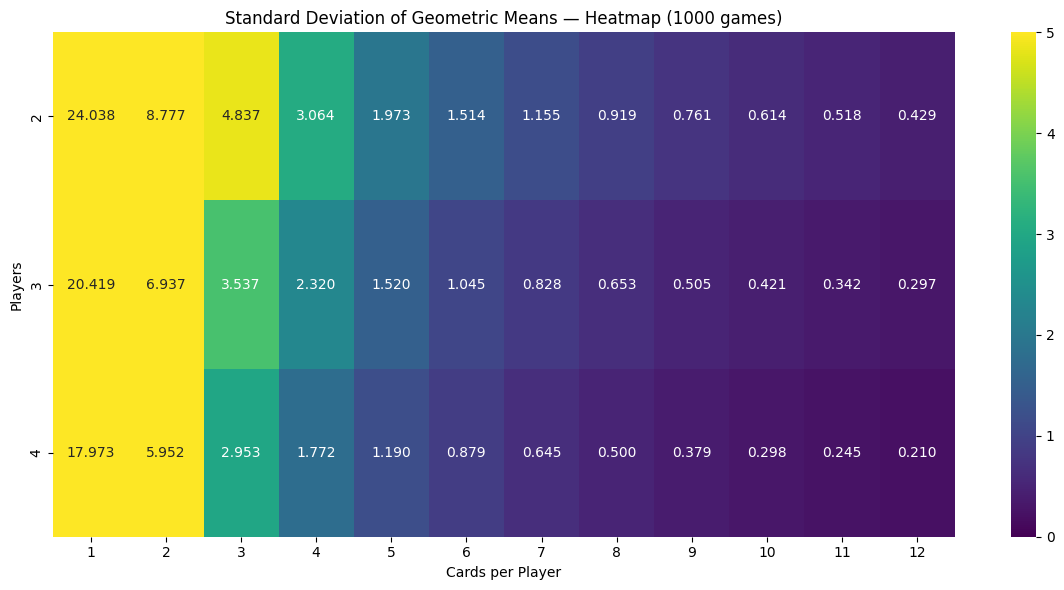

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_std_heatmap(players_max: int = 4, cards_max: int = 12, games: int = 10000):
    sd_matrix = []

    for players in range(2, players_max + 1):
        row = []
        for cards in range(1, cards_max + 1):
            # Get geometric means per game
            gm_list = [average_of_geometric_means([generate_diffs(players, cards)]) for _ in range(games)]
            sd = np.std(gm_list)
            sd *= players
            row.append(sd)
        sd_matrix.append(row)

    df = pd.DataFrame(
        sd_matrix,
        index=[f"{p}" for p in range(2, players_max + 1)],
        columns=[f"{c}" for c in range(1, cards_max + 1)]
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        df,
        annot=True,
        fmt=".3f",
        cmap="viridis",
        vmin=0,
        vmax=5  # optional: cap max if needed
    )

    plt.title(f"Standard Deviation of Geometric Means — Heatmap ({games} games)")
    plt.xlabel("Cards per Player")
    plt.ylabel("Players")
    plt.tight_layout()
    plt.show()


# Run the heatmap
plot_std_heatmap(games=1000)


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Prepare data
players_max = 4
cards_max = 12
games = 1000

# Create a matrix of geometric means
gm_matrix = []
for players in range(2, players_max + 1):
    row = []
    for cards in range(1, cards_max + 1):
        gm_list = [average_of_geometric_means([generate_diffs(players, cards)]) for _ in range(games)]
        gm = np.mean(gm_list)
        row.append(gm)
    gm_matrix.append(row)

gm_matrix = np.array(gm_matrix)

# Create meshgrid for X and Y axes
x = np.arange(1, cards_max + 1)
y = np.arange(2, players_max + 1)
X, Y = np.meshgrid(x, y)

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=gm_matrix, x=X, y=Y, colorscale='Viridis')])

fig.update_layout(
    title='3D Surface of Geometric Means',
    scene=dict(
        xaxis_title='Cards per Player',
        yaxis_title='Players',
        zaxis_title='Geometric Mean',
    ),
    autosize=True,
)

fig.show(renderer="browser")

In [84]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Prepare data
players_max = 4
cards_max = 12
games = 1000

# Create a matrix of standard deviations
sd_matrix = []
for players in range(2, players_max + 1):
    row = []
    for cards in range(1, cards_max + 1):
        # List of geometric means for each game
        gm_list = [average_of_geometric_means([generate_diffs(players, cards)]) for _ in range(games)]
        sd = np.std(gm_list)
        row.append(sd)
    sd_matrix.append(row)

sd_matrix = np.array(sd_matrix)

# Create meshgrid for X and Y axes
x = np.arange(1, cards_max + 1)
y = np.arange(2, players_max + 1)
X, Y = np.meshgrid(x, y)

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=sd_matrix, x=X, y=Y, colorscale='Viridis')])

fig.update_layout(
    title='3D Surface of Standard Deviation of Geometric Means',
    scene=dict(
        xaxis_title='Cards per Player',
        yaxis_title='Players',
        zaxis_title='Standard Deviation',
    ),
    autosize=True,
)

# Render in browser (works even if inline plotting fails)
fig.show(renderer="browser")
